## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## loading the data


In [2]:
data=pd.read_csv("loyalti.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## plotting the data

<function matplotlib.pyplot.show(*args, **kw)>

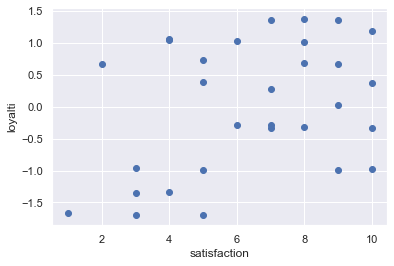

In [3]:
plt.scatter(data["Satisfaction"],data["Loyalty"])
plt.xlabel("satisfaction")
plt.ylabel("loyalti")
plt.show

## creating clusters

In [4]:
x=data.copy()
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
clusters=x.copy()
clusters["clusters"]=kmeans.fit_predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

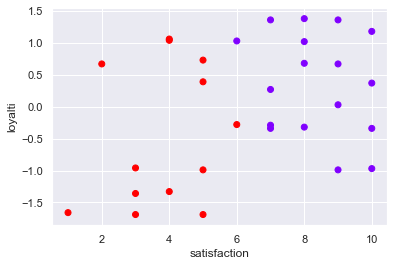

In [7]:
plt.scatter(clusters["Satisfaction"],clusters["Loyalty"],c=clusters["clusters"],cmap="rainbow")
plt.xlabel("satisfaction")
plt.ylabel("loyalti")
plt.show

## standardizing the variables to give equal weightage to each

In [9]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## applying the elbow method to find the best number of clusters


In [12]:
wccs=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wccs.append(kmeans.inertia_)
wccs

[60.0,
 30.35236058808774,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.4602053116458205,
 4.358871893303258,
 3.804128903766371]

<function matplotlib.pyplot.show(*args, **kw)>

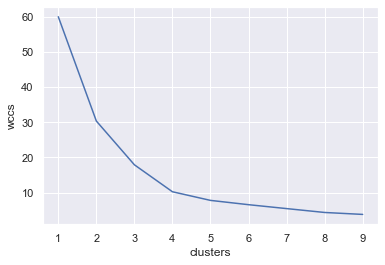

In [14]:
plt.plot(range(1,10),wccs)
plt.xlabel("clusters")
plt.ylabel("wccs")
plt.show

In [17]:
kmeans_new=KMeans(4)
final=x.copy()
kmeans.fit(x_scaled)
clusters=kmeans_new.fit_predict(x_scaled)
final["clusters"]=clusters

<function matplotlib.pyplot.show(*args, **kw)>

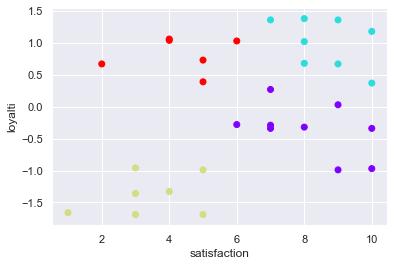

In [18]:
plt.scatter(final["Satisfaction"],final["Loyalty"],c=final["clusters"],cmap="rainbow")
plt.xlabel("satisfaction")
plt.ylabel("loyalti")
plt.show